# Harris Corner Detection

In [ ]:
import numpy as np, matplotlib.pyplot as plt
import cv2

### Loading the Image

In [ ]:
chess = cv2.imread('chess.jpeg')
chess_rgb = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)
chess_gray = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY)

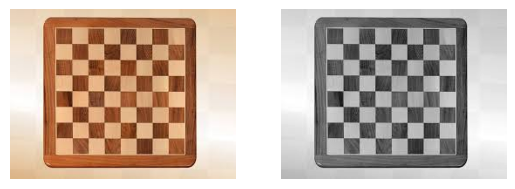

In [ ]:
plt.subplot(1,2,1)
plt.imshow(chess_rgb), plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(chess_gray, cmap="gray"), plt.axis("off")
plt.show()

### Converting gray image to floating point values

- The cv2.cornerHarris function requires the input image to be a floating-point 32-bit grayscale image. This is why you need to convert chess_gray to float32.

In [ ]:
chess_gray = np.float32(chess_gray)
chess_gray

array([[213., 213., 213., ..., 201., 201., 201.],
       [214., 214., 214., ..., 201., 201., 201.],
       [214., 214., 214., ..., 202., 202., 202.],
       ...,
       [187., 187., 187., ..., 225., 225., 225.],
       [187., 187., 187., ..., 225., 225., 225.],
       [187., 187., 187., ..., 224., 224., 224.]], dtype=float32)

### Invoking Harris Corner

In [ ]:
dst = cv2.cornerHarris(chess_gray, blockSize=2, ksize=3, k=0.04)
dst

array([[-0.01      , -0.01      , -0.01      , ..., -0.01      ,
        -0.01      , -0.01      ],
       [-0.01      , -0.01      , -0.01      , ..., -0.01      ,
        -0.01      , -0.01      ],
       [-0.01      , -0.01      , -0.01      , ..., -0.04      ,
        -0.04      , -0.04      ],
       ...,
       [-0.04      , -0.04      , -0.04175781, ..., -1.        ,
         0.19      , -0.64      ],
       [-0.01      , -0.01      , -0.01      , ..., -0.07074219,
         0.21402344, -0.25      ],
       [ 0.        ,  0.        ,  0.        , ...,  0.01566406,
         0.04546875, -0.01      ]], dtype=float32)

### Dilation

- Dilating the result of the Harris corner detector with `cv2.dilate` helps to enlarge the detected corners, making them more visible and easier to identify

In [ ]:
dst = cv2.dilate(dst, None)
dst

array([[-0.01      , -0.01      , -0.01      , ..., -0.01      ,
        -0.01      , -0.01      ],
       [-0.01      , -0.01      , -0.01      , ..., -0.01      ,
        -0.01      , -0.01      ],
       [-0.01      , -0.01      , -0.01      , ..., -0.01      ,
        -0.01      , -0.01      ],
       ...,
       [-0.00347656,  0.04449219,  0.04449219, ...,  0.2566797 ,
         0.2566797 ,  0.2566797 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.2566797 ,
         0.21402344,  0.21402344],
       [ 0.        ,  0.        ,  0.        , ...,  0.2566797 ,
         0.21402344,  0.21402344]], dtype=float32)

### Thresholding and Detection

- This creates a mask by identifying pixels in dst (the result of the Harris corner detector) that are greater than 1% of the maximum value in dst. These pixels correspond to corners.
- `chess_rgb[...] = [0, 0, 255]`: This sets the pixels identified as corners in the original image (chess_rgb) to blue.

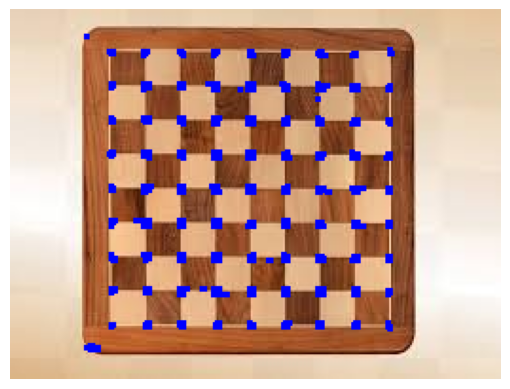

In [ ]:
chess_rgb[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.imshow(chess_rgb), plt.axis("off")
plt.show()

<hr>

# Shi Tomasi Detection

In [ ]:
import numpy as np, matplotlib.pyplot as plt
import cv2

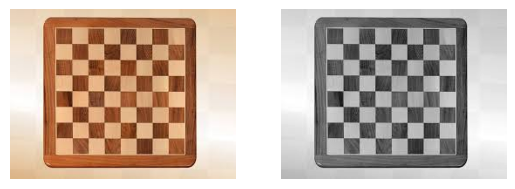

In [ ]:
chess = cv2.imread('chess.jpeg')
chess_rgb = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)
chess_gray = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(chess_rgb), plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(chess_gray, cmap="gray"), plt.axis("off")
plt.show()

- `maxCorners`: This sets the maximum number of corners you want to detect (in this case, 100).
qualityLevel: This parameter determines the minimum quality of a corner. It's a value between 0 and 1, with higher values indicating stronger corners (0.01 is a common value).
- `minDistance`: This sets the minimum Euclidean distance between detected corners. It helps to prevent clustering of corners in a small area (10 pixels apart in this example).


In [ ]:
corners = cv2.goodFeaturesToTrack(chess_gray, maxCorners=10, qualityLevel=0.01, minDistance=10)
corners

array([[[ 70., 111.]],

       [[145.,  58.]],

       [[144., 131.]],

       [[164., 131.]],

       [[180.,  75.]],

       [[ 72.,  93.]],

       [[ 72., 129.]],

       [[ 54.,  59.]],

       [[108.,  94.]],

       [[198.,  93.]]], dtype=float32)

- The `cv2.goodFeaturesToTrack` function returns a NumPy array of corners with floating-point coordinates. However, to draw these corners on an image using functions like `cv2.circle`, you typically need integer coordinates

In [ ]:
corners = np.int0(corners)

<ipython-input-33-d744abe8dca3>:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


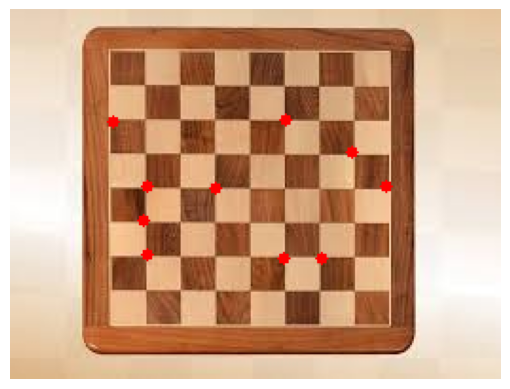

In [ ]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(chess_rgb,(x,y),3,255,-1)

plt.imshow(chess_rgb), plt.axis("off")
plt.show()

<hr>